In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import datasets

# 5. 支持向量机
支持向量机（SVM）是个非常强大并且有多种功能的机器学习模型，能够做线性或者非线性的分类，回归，甚至异常值检测。机器学习领域中最为流行的模型之一，是任何学习机器学习的人必备的工具。SVM 特别适合应用于复杂但中小规模数据集的分类问题。

本章节将阐述支持向量机的核心概念，怎么使用这个强大的模型，以及它是如何工作的。

## 5.1 线性支持向量机分类
SVM的基本思想能够用一些图片来解释得很好，`图5-1`展示了我们在第4章结尾处介绍的鸢尾花数据集的一部分。这两个种类能够被非常清晰，非常容易的用一条直线分开（即线性可分的）。

左边的图显示了三种可能的线性分类器的判定边界。其中用虚线表示的线性模型判定边界很差，甚至不能正确地划分类别。另外两个线性模型在这个数据集表现的很好，但是它们的判定边界很靠近样本点，在新的数据上可能不会表现的很好。相比之下，右边图中SVM分类器的判定边界实线，不仅分开了两种类别，而且还尽可能地远离了最靠近的训练数据点。你可以认为SVM分类器在两种类别之间保持了一条尽可能宽敞的街道（图中平行的虚线），其被称为`最大间隔分类`。

<img src="images/05_01.png" style="width:600px;"/>

我们注意到添加更多的样本点在`街道`外并不会影响到判定边界，因为判定边界是由位于`街道`边缘的样本点确定的，这些样本点被称为`支持向量`（`图5-1`中被圆圈圈起来的点）。

> 警告
> 
> SVM对特征缩放比较敏感，可以看到`图5-2`：左边的图中，垂直的比例要更大于水平的比例，所以最宽的`街道`接近水平。但对特征缩放后（例如使用Scikit-Learn的StandardScaler），判定边界看起来要好得多，如右图。

<img src="images/05_02.png" style="width:600px;"/>

## 5.1.1 软间隔分类
如果我们严格地规定所有的数据都不在`街道`上，都在正确地两边，称为`硬间隔分类`。硬间隔分类有两个问题：
+ 第一，只对线性可分的数据起作用
+ 第二，对异常点敏感

`图5-3`显示了只有一个异常点的鸢尾花数据集：左边的图中很难找到硬间隔，右边的图中判定边界和我们之前在`图5-1`中没有异常点的判定边界非常不一样，它很难一般化。

<img src="images/05_03.png" style="width:600px;"/>

为了避免上述的问题，我们更倾向于使用更加软性的模型。目的在保持`街道`尽可能大和避免间隔违规（例如：数据点出现在`街道`中央或者甚至在错误的一边）之间找到一个良好的平衡。这就是`软间隔分类`。

在Scikit-Learn库的SVM类，你可以用`C`超参数（惩罚系数）来控制这种平衡：较小的C会导致更宽的“街道”，但更多的间隔违规。`图5-4`显示了在非线性可分隔的数据集上，两个软间隔SVM分类器的判定边界。左边图中，使用了较大的`C`值，导致更少的间隔违规，但是间隔较小。右边的图，使用了较小的`C`值，间隔变大了，但是许多数据点出现在了`街道`上。然而，第一个分类器似乎泛化地更好：事实上，在这个训练数据集上减少了预测错误，因为实际上大部分的间隔违规点出现在了判定边界正确的一侧。

<img src="images/05_04.png" style="width:600px;"/>

> 提示
> 
> 如果你的SVM模型过拟合，你可以尝试通过减小超参数`C`去调整。

以下的Scikit-Learn代码加载了内置的鸢尾花（Iris）数据集，缩放特征，并训练一个线性SVM模型（使用`LinearSVC`类，超参数`C=1`，`hinge`损失函数）来检测Virginica鸢尾花，生成的模型在`图5-4`的右图。

In [2]:
iris = datasets.load_iris() 
X = iris["data"][:, (2, 3)] # petal length, petal width 
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([("scaler", StandardScaler()), ("linear_svc", LinearSVC(C=1, loss="hinge")), ])
svm_clf.fit(X, y)

# 预测一个样本
svm_clf.predict([[5.5, 1.7]])

array([1.])

> **注**
> 
> 不同于Logistic回归分类器，SVM分类器不会输出每个类别的概率。

作为一种选择，你可以在SVC类，使用`SVC(kernel="linear", C=1)`，但是它比较慢，尤其在较大的训练集上，所以一般不被推荐。另一个选择是使用`SGDClassifier`类，即`SGDClassifier(loss="hinge", alpha=1/(m*C))`。它应用了随机梯度下降（`SGD`见第四章）来训练一个线性SVM分类器。尽管它不会和`LinearSVC`一样快速收敛，但是对于处理那些不适合放在内存的大数据集是非常有用的，或者处理在线分类任务同样有用。

> **提示**
> 
> LinearSVC要使倾斜特征值规范化，首先你应该集中训练集减去它的平均数。如果你使用了StandardScaler，那么它会自动处理。此外，确保你设置`loss`参数为`hinge`，因为它不是默认值。最后，为了得到更好的效果，你需要将`dual`参数设置为False，除非特征数比样本量多（我们将在本章后面讨论二元性）


## 5.2 非线性支持向量机分类
尽管线性SVM分类器在许多案例上表现得出乎意料的好，但是很多数据集并不是线性可分的。一种处理非线性数据集方法是增加更多的特征，例如多项式特征（正如你在第4章所做的那样）；在某些情况下可以变成线性可分的数据。在`图5-5`的左图中，它只有一个特征$x_1$的简单的数据集，正如你看到的，该数据集不是线性可分的。但是如果你增加了第二个特征$x_2 = (x_1)^2$，产生的2D数据集就能很好的线性可分。

<img src="images/05_05.png" style="width:600px;"/>

为了实施这个想法，通过Scikit-Learn，你可以创建一个流水线（Pipeline）去包含多项式特征（PolynomialFeatures）变换，然后跟随一个StandardScaler和LinearSVC。让我们在月球数据集（moons datasets）测试一下效果：moons数据集是一个用于演示二分类的玩具数据集，它的形状是两个相互交叉的半圆，如`图5-6`所示：

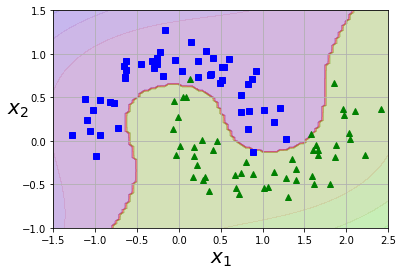

In [3]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42, max_iter=2000))
    ))

polynomial_svm_clf.fit(X, y)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### 5.2.1 多项式核
添加多项式特征很容易实现，不仅仅在SVM，在各种机器学习算法都有不错的表现，但是低次数的多项式不能处理非常复杂的数据集，而高次数的多项式却产生了大量的特征，会使模型变得慢。

幸运的是，当你使用SVM时，你可以运用一个被称为`核技巧`（kernel trick）的神奇数学技巧。它可以取得就像你添加了许多多项式，甚至有高次数的多项式一样好的结果。因为你并没有增加任何特征，所以不会有大量特征导致的组合爆炸。这个技巧可以用SVC类来实现。让我们在Moons数据集测试一下效果。

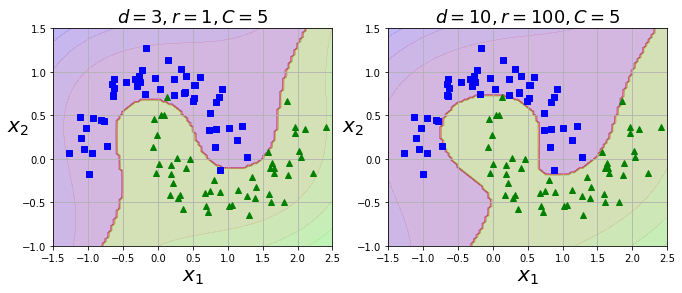

In [4]:
poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ))
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ))
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

这段代码用3阶的多项式核训练了一个SVM分类器，即上面的左图。右图是使用了10阶的多项式核SVM分类器。很明显，如果你的模型过拟合，你可以减小多项式核的阶数。相反的，如果是欠拟合，你可以尝试增大它。超参数`coef0`控制了高阶多项式与低阶多项式对模型的影响。

> 通用的方法是用网格搜索去找到最优超参数。首先进行非常粗略的网格搜索一般会很快，然后在找到的最佳值进行更细的网格搜索。对每个超参数的作用有一个很好的理解可以帮助你在正确的超参数空间找到合适的值。

### 5.2.2 增加相似特征
另一种解决非线性问题的方法是使用`相似函数`（similarity funtion）计算每个样本与`特定地标`（landmark）的相似度。例如，让我们来看看前面讨论过的一维数据集，并在$x_1=-2$和$x_1=1$之间增加两个地标（`图5-8`左图）。

<img src="images/05_08.png" style="width:600px;"/>

接下来，我们定义一个相似函数，即`高斯径向基函数`（Gaussian Radial Basis Function，RBF），设置$\gamma = 0.3$（见`公式5-1`）：

- $\phi\gamma(\mathrm{x},\ell) = exp(-\gamma \Vert \mathrm{x}-\ell \Vert^2)$

它是个从0到1的钟型函数，值为0的离地标很远，值为1的在地标上。现在我们准备计算新特征。例如，我们看一下样本$x_1=-1$：它距离第一个地标距离是1，距离第二个地标是2。因此它的新特征为$x_2=exp(-0.3 × (1^2))≈0.74$和$x_3=exp(-0.3 × (2^2))≈0.30$。`图5-8`右边的图显示了特征转换后的数据集（删除了原始特征），正如你看到的，它现在是线性可分了。

你可能想知道如何选择地标。最简单的方法是在数据集中的每一个样本的位置创建地标。这将产生更多的维度从而增加了转换后数据集是线性可分的可能性。但缺点是，m个样本，n个特征的训练集被转换成了m个实例，m个特征的训练集（假设你删除了原始特征）。这样一来，如果你的训练集非常大，你最终会得到同样大的特征。

### 5.2.3 高斯 RBF 核
就像多项式特征法一样，相似特征法对各种机器学习算法同样也有不错的表现。但是在所有额外特征上的计算成本可能很高，特别是在大规模的训练集上。然而，`核`技巧再一次显现了它在SVM上的神奇之处：高斯核让你可以获得同样好的结果成为可能，就像你在相似特征法添加了许多相似特征一样，但事实上，你并不需要在RBF添加它们。我们使用SVC类的高斯RBF核来检验一下。

In [5]:
rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ))

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

这个模型在下图的左下角表示。其他的图显示了用不同的超参数`gamma` ($\gamma$)和`C`训练的模型。增大$\gamma$使钟型曲线更窄（左上图），导致每个样本的影响范围变得更小：即判定边界最终变得更不规则，在单个样本周围环绕。相反的，较小的$\gamma$值使钟型曲线更宽，样本有更大的影响范围，判定边界最终则更加平滑。所以$\gamma$是可调整的超参数：如果你的模型过拟合，你应该减小$\gamma$值，若欠拟合，则增大$\gamma$（与超参数`C`相似）。

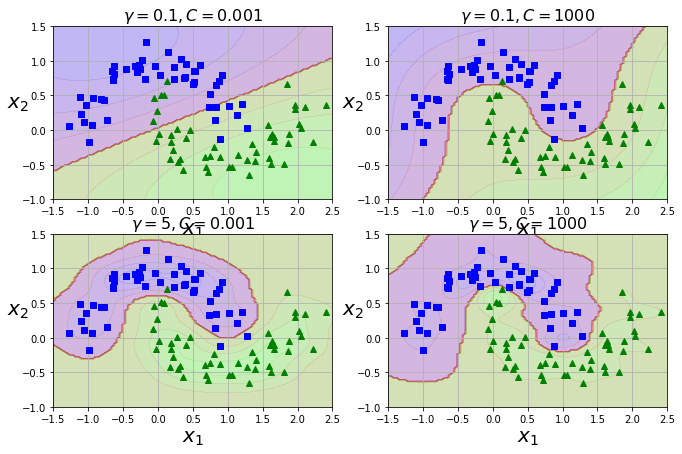

In [6]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ))
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

还有其他的核函数，但很少使用。例如，一些核函数是专门用于特定的数据结构。在对文本文档或者DNA序列进行分类时，有时会使用`字符串核`（String kernels）（例如，使用`SSK核`（string subsequence kernel）或者基于编辑距离（Levenshtein distance）的核函数）。

> **提示**
> 
> 这么多可供选择的核函数，你如何决定使用哪一个？一般来说，你应该先尝试线性核函数（记住`LinearSVC`比`SVC(kernel="linear")`要快得多），尤其是当训练集很大或者有大量的特征的情况下。如果训练集不太大，你也可以尝试`高斯径向基核`（Gaussian RBF Kernel），它在大多数情况下都很有效。如果你有空闲的时间和计算能力，你还可以使用交叉验证和网格搜索来试验其他的核函数，特别是有专门用于你的训练集数据结构的核函数。

### 5.2.4 计算复杂性
`LinearSVC`类基于`liblinear`库，它实现了线性SVM的优化算法。它并不支持核技巧，但是它样本和特征的数量几乎是线性的：训练时间复杂度大约为$O(m*n)$。

如果你要非常高的精度，这个算法需要花费更多时间。这是由容差值超参数$\epsilon$（在Scikit-learn称为tol）控制的。大多数分类任务中，使用默认容差值的效果是已经可以满足一般要求。

SVC类基于libsvm库，它实现了支持核技巧的算法。训练时间复杂度通常介于$O(m^2*n)$和$O(m^3*n)$之间。不幸的是，这意味着当训练样本变大时，它将变得极其慢（例如，成千上万个样本）。这个算法对于复杂但小型或中等数量的数据集表现是完美的。然而，它能对特征数量很好的缩放，尤其对稀疏特征来说（即每个样本都有一些非零特征）。在这个情况下，算法对每个样本的非零特征的平均数量进行大概的缩放。`表5-1`对Scikit-learn的SVM分类模型进行比较。

<img src="images/t05_01.png" style="width:500px;"/>

## 5.3 SVM回归
正如我们之前提到的，SVM算法应用广泛：不仅仅支持线性和非线性的分类任务，还支持线性和非线性的回归任务。技巧在于逆转我们的目标：限制间隔违规的情况下，不是试图在两个类别之间找到尽可能大的`街道`（即间隔）。SVM 回归任务是限制间隔违规情况下，尽量放置更多的样本在`街道`上。`街道`的宽度由超参数$\epsilon$控制。`图5-10`显示了在一些随机生成的线性数据上，两个线性SVM回归模型的训练情况。一个有较大的间隔（$\epsilon=1.5$），另一个间隔较小（$\epsilon=0.5$）。

<img src="images/05_10.png" style="width:600px;"/>

添加更多的数据样本在间隔之内并不会影响模型的预测，因此，这个模型认为是不敏感的（ϵ-insensitive）。

你可以使用Scikit-Learn的LinearSVR类去实现线性SVM回归。下面的代码产生的模型在`图5-10`左图（训练数据需要被中心化和标准化）:
```python
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5) 
svm_reg.fit(X, y)
```

处理非线性回归任务，你可以使用核化的SVM模型。比如，下图显示了在随机二次方的训练集，使用二次方多项式核函数的SVM回归。左图是较小的正则化（即更大的`C`值），右图则是更大的正则化（即小的`C`值）：

/home/alex/3rd/py-venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/alex/3rd/py-venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


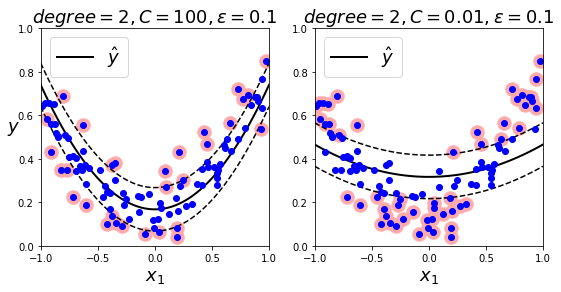

In [7]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(
    svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(
    svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

下面的代码的模型在上图左图，其使用了Scikit-Learn的SVR类（支持核技巧）。在回归任务上，SVR类和SVC类是等价的，而LinearSVR是和LinearSVC等价。LinearSVR类和训练集的大小成线性（就像LinearSVC类），当训练集变大，SVR会变的很慢（就像SVC类）。

```python
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)
```

> **注**
> 
> SVM也可以用来做异常值检测，详情见Scikit-Learn文档

## 5.4 背后机制
这个章节从线性SVM分类器开始，将解释SVM是如何做预测的并且算法是如何工作的。如果你是刚接触机器学习，你可以跳过这个章节，直接进入本章末尾的练习。等到你想深入了解SVM，再回头研究这部分内容。

首先，关于符号的约定：在第4章，我们将所有模型参数放在一个矢量$\theta$里，包括偏置项$\theta_0$，$\theta_1$到$\theta_n$的输入特征权重，和增加一个偏差输入$x_0 = 1$到所有样本。在本章中，我们将使用一个不同的符号约定，在处理SVM上，这更方便，也更常见：偏置项(bias term)被命名为$b$，特征权重向量被称为$w$，在输入特征向量中不再添加偏置特征。

### 5.4.1 决策函数和预测
线性SVM分类器通过简单地计算决策函数$w^T\cdot x+b = w_1x_1+ ⋯ +w_nx_n + b$来预测新样本的类别：如果结果是正的，预测类别$\hat{y}$是正类，为1，否则他就是负类，为0：
- $\hat{y} = \begin{cases}  0, if \ \mathrm{w}^T \cdot \mathrm{x} +b \lt 0, \\ 0, if \ \mathrm{w}^T \cdot \mathrm{x}+b \ge 0\end{cases}$

`图5-12`显示了和`图5-4`右边图模型相对应的决策函数：因为这个数据集有两个特征（花瓣的宽度和花瓣的长度），所以是个二维的平面。决策边界是决策函数等于0的点的集合，图中两个平面的交叉处，即一条直线（图中的实线）：

<img src="images/05_12.png" style="width:600px;"/>

虚线表示的是那些决策函数等于$1$或$-1$的点：它们平行，且到决策边界的距离相等，形成一个间隔。训练线性SVM分类器意味着找到$\mathrm{w}$值和$\mathrm{b}$值使得这一个间隔尽可能大，同时避免间隔违规（硬间隔）或限制它们（软间隔）。

### 5.4.2 训练目标
看下决策函数的斜率：它等于权重向量的范数$\Vert w\Vert$。如果我们把这个斜率除于$2$，决策函数等于$\pm 1$的点将会离决策边界原来的两倍大。换句话，即斜率除于$2$，那么间隔将增加两倍。在`图5-13`中，2D 形式比较容易可视化。权重向量$\mathrm{w}$越小，间隔越大。

<img src="images/05_13.png" style="width:600px;"/>

所以我们的目标是最小化$\Vert w\Vert$，从而获得大的间隔。然而，如果我们想要避免间隔违规（硬间隔），对于所有正的训练样本，我们需要决策函数大于$1$，对于所有负训练样本，决策函数小于$-1$。若我们定义$t^{(i)}=-1$为负样本（即$y^{(i)} = 0$），定义$t^{(i)}=1$为正样本（即$y^{(i)} = 1$），那么我们可以对所有的样本表示为$t^{(i)} (w^T x^{(i)} + b) \ge 1$。

因此，我们可以将硬间隔线性SVM分类器表示为`公式5-3`中的约束优化问题：

- $\underset{\mathrm{w},b}{\mathrm{minimize}}\quad \frac{1}{2}\mathrm{w}^T\cdot \mathrm{w}$

- $subject\ to\quad t^{(i)}(\mathrm{w}^T \cdot \mathrm{x}^{(i)} + b) \ge 1\ for\ i=1,2,3...,m$

> 我们最小化$\frac{1}{2}\mathrm{w}^T\cdot \mathrm{w}$，等价于最小化$frac{1}{2}\Vert \mathrm{w}\Vert^2$，但是不等价于最小化$\Vert \mathrm{w}\Vert$。这会给我们相同的结果（因为最小化$\mathrm{w}$值和$b$值，也是最小化该值一半的平方），函数$\frac{1}{2}\Vert \mathrm{w}\Vert^2$有很好又简单的导数（只有$\mathrm{w}$），而$\Vert \mathrm{w}\Vert$在$\mathrm{w}=0$处是不可微的。优化算法在可微函数表现得更好。

为了获得软间隔的目标，我们需要对每个样本应用一个松弛变量（slack variable）$\zeta^{(i)} \ge 0$。$\zeta^{(i)}$表示了第$i$个样本允许违规间隔的程度。我们现在有两个不一致的目标：一个是使松弛变量尽可能的小，从而减小间隔违规，另一个是使$\frac{1}{2}\Vert \mathrm{w}\Vert^2$尽量小，从而增大间隔。现在超参数`C`可以发挥作用了：它允许我们在两个目标之间权衡。我们得到了`公式5-4`的约束优化问题：

- $\underset{\mathrm{w},b,\zeta}{\mathrm{minimize}}\quad \frac{1}{2}\mathrm{w}^T\cdot \mathrm{w}+C\sum_{i=1}^{m}\zeta^{(i)}$

- $subject\ to\quad t^{(i)}(w^T \cdot x^{(i)} + b) \ge 1-\zeta^{(i)}\quad and \quad \zeta^{(i)} \ge 0,\quad for\ i=1,2,3...,m$

### 5.4.3 二次规划
硬间隔和软间隔都是线性约束的凸二次规划优化问题。这些问题被称之为二次规划（QP）问题。现在有许多解决方案可以使用各种技术来处理QP问题，但这超出了本书的范围。一般问题的公式在`公式5-5`给出。

<img src="images/e05_05.png" style="width:500px;"/>

注意到表达式$Ap ≤ b$实际上定义了$n_c$约束： 

- $p^T a^{(i)} \le b^{(i)}, for i = 1, 2, ..., n$，

$a^{(i)}$是个包含了$A$的第$i$行元素的向量，$b^{(i)}$是$b$的第$i$个元素。

可以很容易地看到，如果你用以下的方式设置QP的参数，你将获得硬间隔线性SVM分类器的目标：
+ $n_p = n+1$，$n$表示特征的数量（$+1$是偏置项）
+ $n_c = m$，$m$表示训练样本数量
+ $H$是$n_p \times n_p$单位矩阵，除了左上角为0（忽略偏置项）
+ $f = 0$，一个全为0的$n_p$维向量
+ $b = 1$，一个全为1的$n_c$维向量
+ $a^{(i)} = –t^{(i)} \dot{x}^{(i)}$，$\dot{x}^{(i)}$等于$x^{(i)}$带一个额外的偏置特征$\dot{x}_0=1$

所以训练硬间隔线性SVM分类器的一种方式是使用现有的QP解决方案，即上述的参数。由此产生的向量$p$将包含偏置项$b=p_0$和特征权重$w_i=p_i (i=1,2,...m)$。同样的，你可以使用QP解决方案来解决软间隔问题（见本章最后的练习）。

然而，使用核技巧我们将会看到一个不同的约束优化问题。

### 5.4.4 对偶问题
给出一个约束优化问题，即`原始问题`（primal problem），它可能表示不同但是和另一个问题紧密相连，称为`对偶问题`（Dual Problem）。对偶问题的解通常是对原始问题的解给出一个下界约束，但在某些条件下，它们可以获得相同解。幸运的是，SVM问题恰好满足这些条件，所以你可以选择解决原始问题或者对偶问题，两者将会有相同解。`公式5-6`表示了线性SVM的对偶形式（如果你对怎么从原始问题获得对偶问题感兴趣，可以看下附录 C）。

<img src="images/e05_06.png" style="width:400px;"/>

一旦你找到最小化公式的向量$\alpha$（使用 QP 解决方案），你可以通过使用`公式5-7`的方法计算$\mathrm{w}$和$b$，从而使原始问题最小化。

<img src="images/e05_07.png" style="width:400px;"/>

当训练样本的数量比特征数量小的时候，对偶问题比原始问题要快得多。更重要的是，它让核技巧成为可能，而原始问题则不然。那么这个核技巧是怎么样的呢？

### 5.4.5 核化支持向量机
假设你想把一个二次多项式变换应用到二维空间的训练集(例如卫星数据集)，然后在变换后的训练集上训练一个线性SVM分类器。`公式5-8`显示了你想应用的二次多项式映射函数$\phi$。

<img src="images/e05_08.png" style="width:350px;"/>

注意到转换后的向量是三维的而不是二维。让我们看下对两个二维向量$a$和$b$应用这个二次多项式映射，然后计算转换后向量的点积(见`公式5-9`)会发生什么。

<img src="images/e05_09.png" style="width:420px;"/>

结果怎样呐？转换后向量的点积等于原始向量点积的平方：
- $\phi(a)^T \phi(b) = (a^T b)^2$

关键点在于：如果你应用转换$\phi$到所有训练样本，那么对偶问题(见`公式5-6`)将会包含点积$\phi(x^{(i)})^T \phi(x^{(j)})$。但如果$\phi$像在`公式5-8`定义的二次多项式转换，那么你可以将这个转换后的向量点积替换成$(x^{(i)T} x^{(j)})^2$。所以实际上你根本不需要对训练样本进行转换：仅仅需要在`公式5-6`中，将点积替换成它点积的平方。结果将会和你经过麻烦的训练集转换并拟合出线性SVM算法得出的结果一样，但是这个技巧使得整个过程在计算上面更有效率。这就是核技巧的精髓。

函数$K(a, b) = (a^Tb)^2$被称为`二次多项式核`(polynomial kernel)。在机器学习，`核函数`是一个能计算点积的函数，并只基于原始向量$a$和$b$，不需要计算(甚至知道)转换映射函数$\phi$。`公式5-10`列举了一些最常用的核函数。

<img src="images/e05_10.png" style="width:330px;"/>

> **Mercer定理**
> 
> 根据Mercer定理，如果函数$K(a, b)$满足一些被称为`Mercer条件`的数学条件($K$函数在参数内必须是连续、对称，即K$(a, b)=K(b, a)$，等)，那么存在函数$\phi$，将$a$和$b$映射到另一个空间(可能有更高的维度)，有$K(a, b) = \phi(a)^T \phi(b)$。所以你可以用$K$作为核函数，即使你不知道$\phi$是什么。使用高斯核(Gaussian RBF kernel)情况下，它实际是将每个训练样本映射到无限维空间，所以你不需要知道是怎么执行映射的也是一件好事
> 
> 注意一些常用核函数(例如`Sigmoid`核函数)并不满足所有的Mercer条件，然而在实践中通常表现得很好。

我们还有一个问题要解决。`公式5-7`展示了线性SVM分类器如何从对偶解到原始解，如果你应用了核技巧那么得到的公式会包含$\phi(x^{(i)})$。事实上，$w$必须和$\phi(x^{(i)})$有同样的维度，可能是巨大的维度或者无限的维度，所以你很难计算它。但怎么在不知道$w$的情况下做出预测？好消息是你可以将`公式5-7`的$w$代入到新的样本$x^{(n)}$的决策函数中，你会得到一个在输入向量之间只有点积的方程式。这时，核技巧将派上用场，见`公式5-11`。

<img src="images/e05_11.png" style="width:400px;"/>

注意到支持向量才满足$\alpha^(i)≠0$，做出预测只涉及计算为支持向量部分的输入样本$x^{(n)}$的点积，而不是全部的训练样本。当然，你同样也需要使用同样的技巧来计算偏置项$b$，见`公式5-12`。

<img src="images/e05_12.png" style="width:450px;"/>

如果你开始感到头痛，这很正常：因为这是核技巧一个不幸的副作用。

### 5.4.6 在线支持向量机
在结束这一章之前，我们快速地了解一下在线SVM分类器(回想一下，在线学习意味着增量地学习，不断有新实例)。对于线性SVM分类器，一种方式是使用梯度下降(例如使用SGDClassifire)最小化代价函数，如从原始问题推导出的`公式5-13`。不幸的是，它比基于 QP 方式收敛慢得多。

- $\displaystyle J(\mathrm{w},b)=\frac{1}{2}\mathrm{w}^T\mathrm{w}+C\sum_{i=1}^{m}\max{\lgroup 0,1-t^{(i)}(\mathrm{w}^Tx^{(i)}+b)\rgroup}$

代价函数第一项会使模型有一个小的权重向量$w$，从而获得一个更大的间隔。第二项计算所有间隔违规的总数。如果样本位于`街道`上和正确的一边，或它与`街道`正确一边的距离成比例，则间隔违规等于0。最小化保证了模型的间隔违规尽可能小并且少。

> **Hinge损失**
> 
> 函数$max(0, 1–t)$被称为`Hinge损失函数`(如下)。当$t≥1$时，Hinge值为0。如果$t<1$，它的导数(斜率)为$-1$；若$t>1$，则等于0。在$t=1$处，它是不可微的，但就像Lasso回归(Lasso Regression)(参见`130页`Lasso回归)一样，你仍然可以在$t=0$时使用梯度下降法(即`-1`到`0`之间任何值)。
> 
> <img src="images/e05_14.png" style="width:350px;"/>

我们也可以实现在线核化的 SVM。例如使用“增量和递减SVM学习”或者“在线和主动的快速核分类器”。但是，这些都是用Matlab和C++实现的。对于大规模的非线性问题，你可能需要考虑使用神经网络(见第二部分)